In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
!pip3 list

Package          Version     
---------------- ------------
backcall         0.1.0       
beautifulsoup4   4.8.2       
branca           0.4.0       
bs4              0.0.1       
certifi          2019.11.28  
chardet          3.0.4       
cycler           0.10.0      
decorator        4.4.2       
folium           0.10.1      
geographiclib    1.50        
geopy            1.21.0      
idna             2.9         
ipykernel        5.2.1       
ipython          7.13.0      
ipython-genutils 0.2.0       
jedi             0.17.0      
Jinja2           2.11.1      
joblib           0.14.1      
jupyter-client   6.1.3       
jupyter-core     4.6.3       
kiwisolver       1.2.0       
kneed            0.6.0       
MarkupSafe       1.1.1       
matplotlib       3.2.1       
numpy            1.18.1      
pandas           1.0.2       
parso            0.7.0       
pexpect          4.8.0       
pickleshare      0.7.5       
pip              20.0.2      
prompt-toolkit   3.0.5       
ptyprocess

In [3]:
df = pd.read_csv("covid-19-data.csv")
df.head(3)

Entity Code          Date  Cumulative tests  \
0  Afghanistan  AFG  Dec 31, 2019               NaN   
1  Afghanistan  AFG   Jan 1, 2020               NaN   
2  Afghanistan  AFG   Jan 2, 2020               NaN   

   Cumulative tests per million  Total confirmed cases (cases)  \
0                           NaN                            0.0   
1                           NaN                            0.0   
2                           NaN                            0.0   

   Confirmed cases per million (cases per million)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   

   Total confirmed deaths (deaths)  \
0                              0.0   
1                              0.0   
2                              0.0   

   Confirmed deaths per million (deaths per million)  
0                                                0.0  
1                                                0.0  
2                                                0.0

In [80]:
df.columns

Index(['Entity', 'Code', 'Date', 'Cumulative tests',
       'Cumulative tests per million', 'Total confirmed cases (cases)',
       'Confirmed cases per million (cases per million)',
       'Total confirmed deaths (deaths)',
       'Confirmed deaths per million (deaths per million)'],
      dtype='object')

In [81]:
df = df[['Entity', 'Date',
       'Total confirmed cases (cases)']]

In [82]:
df['group'] = df['Entity']

In [83]:
df

Entity          Date  Total confirmed cases (cases)        group
0      Afghanistan  Dec 31, 2019                            0.0  Afghanistan
1      Afghanistan   Jan 1, 2020                            0.0  Afghanistan
2      Afghanistan   Jan 2, 2020                            0.0  Afghanistan
3      Afghanistan   Jan 3, 2020                            0.0  Afghanistan
4      Afghanistan   Jan 4, 2020                            0.0  Afghanistan
5      Afghanistan   Jan 5, 2020                            0.0  Afghanistan
6      Afghanistan   Jan 6, 2020                            0.0  Afghanistan
7      Afghanistan   Jan 7, 2020                            0.0  Afghanistan
8      Afghanistan   Jan 8, 2020                            0.0  Afghanistan
9      Afghanistan   Jan 9, 2020                            0.0  Afghanistan
10     Afghanistan  Jan 10, 2020                            0.0  Afghanistan
11     Afghanistan  Jan 11, 2020                            0.0  Afghanistan
12     Afghanistan  Jan 12, 2020                            0.0  Afghanistan
13     Afghanistan  Jan 13, 2020                            0.0  Afghanistan
14     Afghanistan  Jan 14, 2020                            0.0  Afghanistan
15     Afghanistan  Jan 15, 2020                            0.0  Afghanistan
16     Afghanistan  Jan 16, 2020                            0.0  Afghanistan
17     Afghanistan  Jan 17, 2020                            0.0  Afghanistan
18     Afghanistan  Jan 18, 2020                            0.0  Afghanistan
19     Afghanistan  Jan 19, 2020                            0.0  Afghanistan
20     Afghanistan  Jan 20, 2020                            0.0  Afghanistan
21     Afghanistan  Jan 21, 2020                            0.0  Afghanistan
22     Afghanistan  Jan 22, 2020                            0.0  Afghanistan
23     Afghanistan  Jan 23, 2020                            0.0  Afghanistan
24     Afghanistan  Jan 24, 2020                            0.0  Afghanistan
25     Afghanistan  Jan 25, 2020                            0.0  Afghanistan
26     Afghanistan  Jan 26, 2020                            0.0  Afghanistan
27     Afghanistan  Jan 27, 2020                            0.0  Afghanistan
28     Afghanistan  Jan 28, 2020                            0.0  Afghanistan
29     Afghanistan  Jan 29, 2020                            0.0  Afghanistan
...            ...           ...                            ...          ...
12351       Zambia   Apr 8, 2020                           39.0       Zambia
12352       Zambia   Apr 9, 2020                           39.0       Zambia
12353       Zambia  Apr 10, 2020                           39.0       Zambia
12354       Zambia  Apr 11, 2020                           40.0       Zambia
12355       Zambia  Apr 12, 2020                           40.0       Zambia
12356       Zambia  Apr 13, 2020                           43.0       Zambia
12357     Zimbabwe  Mar 21, 2020                            1.0     Zimbabwe
12358     Zimbabwe  Mar 22, 2020                            2.0     Zimbabwe
12359     Zimbabwe  Mar 23, 2020                            2.0     Zimbabwe
12360     Zimbabwe  Mar 24, 2020                            2.0     Zimbabwe
12361     Zimbabwe  Mar 25, 2020                            2.0     Zimbabwe
12362     Zimbabwe  Mar 26, 2020                            3.0     Zimbabwe
12363     Zimbabwe  Mar 27, 2020                            3.0     Zimbabwe
12364     Zimbabwe  Mar 28, 2020                            5.0     Zimbabwe
12365     Zimbabwe  Mar 29, 2020                            7.0     Zimbabwe
12366     Zimbabwe  Mar 30, 2020                            7.0     Zimbabwe
12367     Zimbabwe  Mar 31, 2020                            7.0     Zimbabwe
12368     Zimbabwe   Apr 1, 2020                            8.0     Zimbabwe
12369     Zimbabwe   Apr 2, 2020                            8.0     Zimbabwe
12370     Zimbabwe   Apr 3, 2020                            8.0     Zimbabwe
12371   

In [86]:
df.shape

(12381, 4)

In [87]:
df.dropna()

Entity          Date  Total confirmed cases (cases)        group
0      Afghanistan  Dec 31, 2019                            0.0  Afghanistan
1      Afghanistan   Jan 1, 2020                            0.0  Afghanistan
2      Afghanistan   Jan 2, 2020                            0.0  Afghanistan
3      Afghanistan   Jan 3, 2020                            0.0  Afghanistan
4      Afghanistan   Jan 4, 2020                            0.0  Afghanistan
5      Afghanistan   Jan 5, 2020                            0.0  Afghanistan
6      Afghanistan   Jan 6, 2020                            0.0  Afghanistan
7      Afghanistan   Jan 7, 2020                            0.0  Afghanistan
8      Afghanistan   Jan 8, 2020                            0.0  Afghanistan
9      Afghanistan   Jan 9, 2020                            0.0  Afghanistan
10     Afghanistan  Jan 10, 2020                            0.0  Afghanistan
11     Afghanistan  Jan 11, 2020                            0.0  Afghanistan
12     Afghanistan  Jan 12, 2020                            0.0  Afghanistan
13     Afghanistan  Jan 13, 2020                            0.0  Afghanistan
14     Afghanistan  Jan 14, 2020                            0.0  Afghanistan
15     Afghanistan  Jan 15, 2020                            0.0  Afghanistan
16     Afghanistan  Jan 16, 2020                            0.0  Afghanistan
17     Afghanistan  Jan 17, 2020                            0.0  Afghanistan
18     Afghanistan  Jan 18, 2020                            0.0  Afghanistan
19     Afghanistan  Jan 19, 2020                            0.0  Afghanistan
20     Afghanistan  Jan 20, 2020                            0.0  Afghanistan
21     Afghanistan  Jan 21, 2020                            0.0  Afghanistan
22     Afghanistan  Jan 22, 2020                            0.0  Afghanistan
23     Afghanistan  Jan 23, 2020                            0.0  Afghanistan
24     Afghanistan  Jan 24, 2020                            0.0  Afghanistan
25     Afghanistan  Jan 25, 2020                            0.0  Afghanistan
26     Afghanistan  Jan 26, 2020                            0.0  Afghanistan
27     Afghanistan  Jan 27, 2020                            0.0  Afghanistan
28     Afghanistan  Jan 28, 2020                            0.0  Afghanistan
29     Afghanistan  Jan 29, 2020                            0.0  Afghanistan
...            ...           ...                            ...          ...
12351       Zambia   Apr 8, 2020                           39.0       Zambia
12352       Zambia   Apr 9, 2020                           39.0       Zambia
12353       Zambia  Apr 10, 2020                           39.0       Zambia
12354       Zambia  Apr 11, 2020                           40.0       Zambia
12355       Zambia  Apr 12, 2020                           40.0       Zambia
12356       Zambia  Apr 13, 2020                           43.0       Zambia
12357     Zimbabwe  Mar 21, 2020                            1.0     Zimbabwe
12358     Zimbabwe  Mar 22, 2020                            2.0     Zimbabwe
12359     Zimbabwe  Mar 23, 2020                            2.0     Zimbabwe
12360     Zimbabwe  Mar 24, 2020                            2.0     Zimbabwe
12361     Zimbabwe  Mar 25, 2020                            2.0     Zimbabwe
12362     Zimbabwe  Mar 26, 2020                            3.0     Zimbabwe
12363     Zimbabwe  Mar 27, 2020                            3.0     Zimbabwe
12364     Zimbabwe  Mar 28, 2020                            5.0     Zimbabwe
12365     Zimbabwe  Mar 29, 2020                            7.0     Zimbabwe
12366     Zimbabwe  Mar 30, 2020                            7.0     Zimbabwe
12367     Zimbabwe  Mar 31, 2020                            7.0     Zimbabwe
12368     Zimbabwe   Apr 1, 2020                            8.0     Zimbabwe
12369     Zimbabwe   Apr 2, 2020                            8.0     Zimbabwe
12370     Zimbabwe   Apr 3, 2020                            8.0     Zimbabwe
12371   

In [88]:
date = list(df['Date'].unique())
date = ['Dec 31, 2019',
 'Jan 1, 2020',
 'Jan 2, 2020',
 'Jan 3, 2020',
 'Jan 4, 2020',
 'Jan 5, 2020',
 'Jan 6, 2020',
 'Jan 7, 2020',
 'Jan 8, 2020',
 'Jan 9, 2020',
 'Jan 10, 2020',
 'Jan 11, 2020',
 'Jan 12, 2020',
 'Jan 13, 2020',
 'Jan 14, 2020',
 'Jan 15, 2020',
 'Jan 16, 2020',
 'Jan 17, 2020',
 'Jan 18, 2020',
 'Jan 19, 2020',
 'Jan 20, 2020',
 'Jan 21, 2020',
 'Jan 22, 2020',
 'Jan 23, 2020',
 'Jan 24, 2020',
 'Jan 25, 2020',
 'Jan 26, 2020',
 'Jan 27, 2020',
 'Jan 28, 2020',
 'Jan 29, 2020',
 'Jan 30, 2020',
 'Jan 31, 2020',
 'Feb 1, 2020',
 'Feb 2, 2020',
 'Feb 3, 2020',
 'Feb 4, 2020',
 'Feb 5, 2020',
 'Feb 6, 2020',
 'Feb 7, 2020',
 'Feb 8, 2020',
 'Feb 9, 2020',
 'Feb 10, 2020',
 'Feb 11, 2020',
 'Feb 12, 2020',
 'Feb 13, 2020',
 'Feb 14, 2020',
 'Feb 15, 2020',
 'Feb 16, 2020',
 'Feb 17, 2020',
 'Feb 18, 2020',
 'Feb 19, 2020',
 'Feb 20, 2020',
 'Feb 21, 2020',
 'Feb 22, 2020',
 'Feb 23, 2020',
 'Feb 24, 2020',
 'Feb 25, 2020',
 'Feb 26, 2020',
 'Feb 27, 2020',
 'Feb 28, 2020',
 'Feb 29, 2020',
 'Mar 1, 2020',
 'Mar 2, 2020',
'Mar 3, 2020',
 'Mar 4, 2020',
 'Mar 5, 2020',
 'Mar 6, 2020',
 'Mar 7, 2020',
 'Mar 9, 2020',
 'Mar 10, 2020',
'Mar 11, 2020',
 'Mar 12, 2020',
 'Mar 13, 2020',
 'Mar 14, 2020', 
'Mar 15, 2020',
 'Mar 16, 2020',
 'Mar 17, 2020',
 'Mar 18, 2020',
 'Mar 19, 2020',
 'Mar 20, 2020',
 'Mar 21, 2020',
 'Mar 22, 2020',
 'Mar 23, 2020',
 'Mar 24, 2020',
 'Mar 25, 2020',
 'Mar 26, 2020',
 'Mar 27, 2020',
 'Mar 28, 2020',
 'Mar 29, 2020',
 'Mar 30, 2020',
 'Mar 31, 2020',
 'Apr 1, 2020',
 'Apr 2, 2020',
 'Apr 3, 2020',
 'Apr 4, 2020',
 'Apr 5, 2020',
 'Apr 6, 2020',
 'Apr 7, 2020',
 'Apr 8, 2020',
 'Apr 9, 2020',
 'Apr 10, 2020',
 'Apr 11, 2020',
 'Apr 12, 2020',
 'Apr 13, 2020']
date

['Dec 31, 2019',
 'Jan 1, 2020',
 'Jan 2, 2020',
 'Jan 3, 2020',
 'Jan 4, 2020',
 'Jan 5, 2020',
 'Jan 6, 2020',
 'Jan 7, 2020',
 'Jan 8, 2020',
 'Jan 9, 2020',
 'Jan 10, 2020',
 'Jan 11, 2020',
 'Jan 12, 2020',
 'Jan 13, 2020',
 'Jan 14, 2020',
 'Jan 15, 2020',
 'Jan 16, 2020',
 'Jan 17, 2020',
 'Jan 18, 2020',
 'Jan 19, 2020',
 'Jan 20, 2020',
 'Jan 21, 2020',
 'Jan 22, 2020',
 'Jan 23, 2020',
 'Jan 24, 2020',
 'Jan 25, 2020',
 'Jan 26, 2020',
 'Jan 27, 2020',
 'Jan 28, 2020',
 'Jan 29, 2020',
 'Jan 30, 2020',
 'Jan 31, 2020',
 'Feb 1, 2020',
 'Feb 2, 2020',
 'Feb 3, 2020',
 'Feb 4, 2020',
 'Feb 5, 2020',
 'Feb 6, 2020',
 'Feb 7, 2020',
 'Feb 8, 2020',
 'Feb 9, 2020',
 'Feb 10, 2020',
 'Feb 11, 2020',
 'Feb 12, 2020',
 'Feb 13, 2020',
 'Feb 14, 2020',
 'Feb 15, 2020',
 'Feb 16, 2020',
 'Feb 17, 2020',
 'Feb 18, 2020',
 'Feb 19, 2020',
 'Feb 20, 2020',
 'Feb 21, 2020',
 'Feb 22, 2020',
 'Feb 23, 2020',
 'Feb 24, 2020',
 'Feb 25, 2020',
 'Feb 26, 2020',
 'Feb 27, 2020',
 'Feb 28, 2020'

In [89]:
pcolors = cm.rainbow(np.linspace(0, 1, 225))
pcolors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.92156863e-01, 1.23196595e-02, 9.99981027e-01, 1.00000000e+00],
       [4.84313725e-01, 2.46374492e-02, 9.99924110e-01, 1.00000000e+00],
       [4.76470588e-01, 3.69514994e-02, 9.99829250e-01, 1.00000000e+00],
       [4.68627451e-01, 4.92599411e-02, 9.99696452e-01, 1.00000000e+00],
       [4.60784314e-01, 6.15609061e-02, 9.99525720e-01, 1.00000000e+00],
       [4.52941176e-01, 7.38525275e-02, 9.99317060e-01, 1.00000000e+00],
       [4.37254902e-01, 9.84002783e-02, 9.98785992e-01, 1.00000000e+00],
       [4.29411765e-01, 1.10652682e-01, 9.98463604e-01, 1.00000000e+00],
       [4.21568627e-01, 1.22888291e-01, 9.98103329e-01, 1.00000000e+00],
       [4.13725490e-01, 1.35105247e-01, 9.97705180e-01, 1.00000000e+00],
       [4.05882353e-01, 1.47301698e-01, 9.97269173e-01, 1.00000000e+00],
       [3.98039216e-01, 1.59475791e-01, 9.96795325e-01, 1.00000000e+00],
       [3.90196078e-01, 1.71625679e-01, 9.96283653e

In [90]:
colors = dict(zip(
    ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe',
       'European Union', 'Faeroe Islands', 'Falkland Islands', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'High income', 'Honduras',
       'Hungary', 'Iceland', 'India', 'India, people tested', 'Indonesia',
       'International', 'Iran', 'Iraq', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Low income', 'Lower middle income', 'Luxembourg',
       'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
       'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova',
       'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'North America', 'Northern Mariana Islands', 'Norway', 'Oceania',
       'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore',
       'Singapore, swabs tested', 'Sint Maarten (Dutch part)', 'Slovakia',
       'Slovenia', 'Somalia', 'South Africa', 'South America',
       'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syria',
       'Taiwan', 'Tanzania', 'Thailand', 'Timor', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turks and Caicos Islands', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'United States Virgin Islands',
       'United States, specimens tested (CDC)', 'Upper middle income',
       'Uruguay', 'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam',
       'World', 'World excl. China', 'World excl. China and South Korea',
       'World excl. China, South Korea, Japan and Singapore', 'Yemen',
       'Zambia', 'Zimbabwe'],
    pcolors
))
group_lk = df.set_index('Entity')['group'].to_dict()

In [91]:
group_lk['India']

'India'

In [92]:
df['Total confirmed cases (cases)'].max()

1807308.0

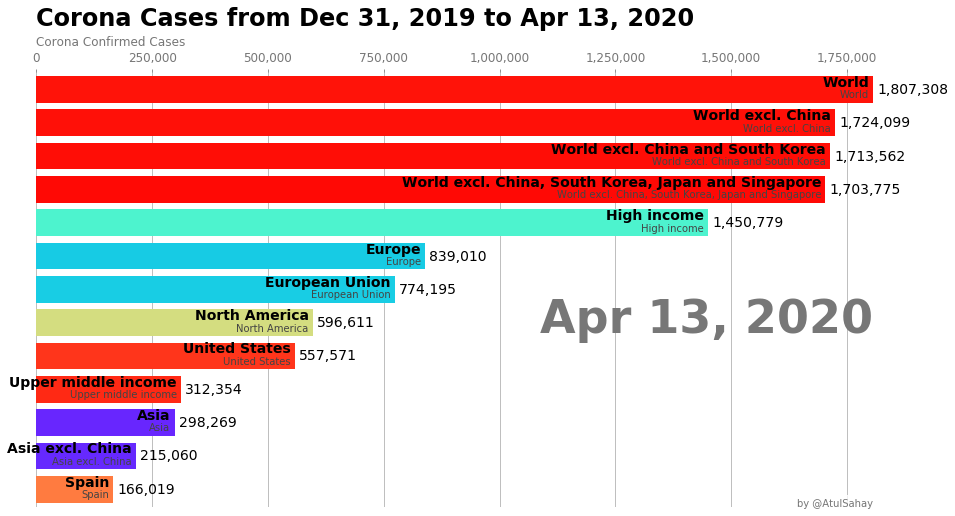

In [102]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = df[df['Date'].eq(current_year)].sort_values(by='Total confirmed cases (cases)', ascending=True).tail(13)
    ax.clear()
    ax.barh(dff['Entity'], dff['Total confirmed cases (cases)'], color=[colors[group_lk[x]] for x in dff['Entity']])
    dx = df['Total confirmed cases (cases)'].max()/200
#     ax.set_ylim(0,dx)
    for i, (value, name) in enumerate(zip(dff['Total confirmed cases (cases)'], dff['Entity'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Corona Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Corona Cases from Dec 31, 2019 to Apr 13, 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @AtulSahay', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart('Apr 13, 2020')

In [104]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=date, interval=700)
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

ValueError: Image size of 561554x516 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x576 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

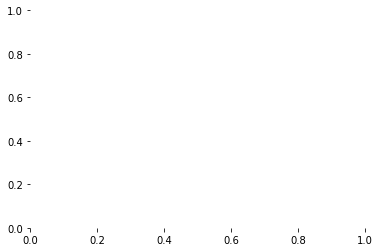

In [105]:
animator.save('the_movie700.mp4', writer = 'ffmpeg', fps=6,bitrate=1800)

# Analysis of the coronacases in world

## Knee Detection algorithm

In [4]:
df.loc['India']

KeyError: 'India'

In [14]:
df.loc[df['Entity'] == 'India',['Date','Total confirmed cases (cases)']]

Date  Total confirmed cases (cases)
4964  Dec 31, 2019                            0.0
4965   Jan 1, 2020                            0.0
4966   Jan 2, 2020                            0.0
4967   Jan 3, 2020                            0.0
4968   Jan 4, 2020                            0.0
...            ...                            ...
5063   Apr 9, 2020                         5734.0
5064  Apr 10, 2020                         6412.0
5065  Apr 11, 2020                         7447.0
5066  Apr 12, 2020                         8356.0
5067  Apr 13, 2020                         9152.0

[104 rows x 2 columns]

In [52]:
x = df.loc[df['Entity'] == 'China',['Date']]
x = range(len(list(x['Date'])))

In [53]:
y = df.loc[df['Entity'] == 'China',['Total confirmed cases (cases)']]
y = list(y['Total confirmed cases (cases)'])
y

[27.0,
 27.0,
 27.0,
 44.0,
 44.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 63.0,
 80.0,
 216.0,
 235.0,
 386.0,
 526.0,
 623.0,
 882.0,
 1323.0,
 1988.0,
 2775.0,
 4528.0,
 5994.0,
 7734.0,
 9714.0,
 11809.0,
 14399.0,
 17211.0,
 20448.0,
 24320.0,
 28047.0,
 31207.0,
 34625.0,
 37232.0,
 40206.0,
 42696.0,
 44724.0,
 59865.0,
 64021.0,
 66559.0,
 68566.0,
 70618.0,
 72508.0,
 74258.0,
 74652.0,
 75543.0,
 76369.0,
 77016.0,
 77234.0,
 77749.0,
 78159.0,
 78598.0,
 78927.0,
 79355.0,
 79929.0,
 80134.0,
 80261.0,
 80380.0,
 80497.0,
 80667.0,
 80768.0,
 80814.0,
 80859.0,
 80879.0,
 80908.0,
 80932.0,
 80954.0,
 80973.0,
 80995.0,
 81020.0,
 81063.0,
 81086.0,
 81130.0,
 81229.0,
 81281.0,
 81346.0,
 81484.0,
 81553.0,
 81631.0,
 81733.0,
 81827.0,
 81946.0,
 82059.0,
 82157.0,
 82241.0,
 82295.0,
 82395.0,
 82465.0,
 82527.0,
 82575.0,
 82642.0,
 82698.0,
 82784.0,
 82870.0,
 82925.0,
 83004.0,
 83097.0,
 83209.0]

84.0days


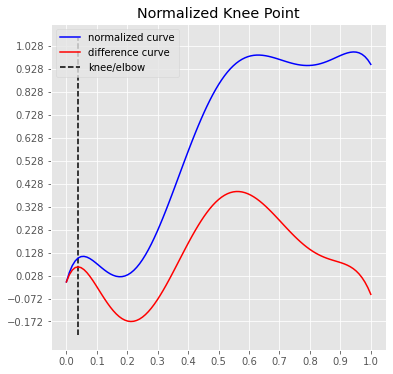

In [57]:
import numpy as np
from kneed import DataGenerator, KneeLocator

kneedle = KneeLocator(x, y, S=1.0,curvinterp_method='polynomial')#curve='convex', direction='increasing')

kneedle.plot_knee_normalized()
print(str(0.8*len(x))+"days")

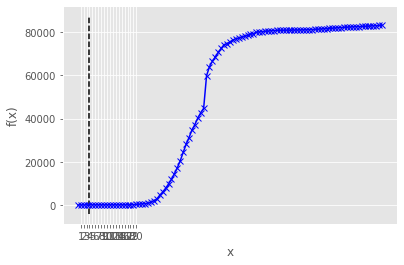

In [56]:
import matplotlib.pyplot as plt
kn = KneeLocator(x, y,interp_method='polynomial')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks(range(1,21))
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [51]:
import numpy as np
import numpy.matlib as matlib
curve = [8.4663, 8.3457, 5.4507, 5.3275, 4.8305, 4.7895, 4.6889, 4.6833, 4.6819, 4.6542, 4.6501, 4.6287, 4.6162, 4.585, 4.5535, 4.5134, 4.474, 4.4089, 4.3797, 4.3494, 4.3268, 4.3218, 4.3206, 4.3206, 4.3203, 4.2975, 4.2864, 4.2821, 4.2544, 4.2288, 4.2281, 4.2265, 4.2226, 4.2206, 4.2146, 4.2144, 4.2114, 4.1923, 4.19, 4.1894, 4.1785, 4.178, 4.1694, 4.1694, 4.1694, 4.1556, 4.1498, 4.1498, 4.1357, 4.1222, 4.1222, 4.1217, 4.1192, 4.1178, 4.1139, 4.1135, 4.1125, 4.1035, 4.1025, 4.1023, 4.0971, 4.0969, 4.0915, 4.0915, 4.0914, 4.0836, 4.0804, 4.0803, 4.0722, 4.065, 4.065, 4.0649, 4.0644, 4.0637, 4.0616, 4.0616, 4.061, 4.0572, 4.0563, 4.056, 4.0545, 4.0545, 4.0522, 4.0519, 4.0514, 4.0484, 4.0467, 4.0463, 4.0422, 4.0392, 4.0388, 4.0385, 4.0385, 4.0383, 4.038, 4.0379, 4.0375, 4.0364, 4.0353, 4.0344]
nPoints = len(curve)
allCoord = np.vstack((range(nPoints), curve)).T
np.array([range(nPoints), curve])
firstPoint = allCoord[0]
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
vecFromFirst = allCoord - firstPoint
scalarProduct = np.sum(vecFromFirst * matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
idxOfBestPoint = np.argmax(distToLine)
idxOfBestPoint

6

[22, 137, 178, 258, 305, 482, 482]
[0.02, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]


AttributeError: 'KneeLocator' object has no attribute 'x_distance'

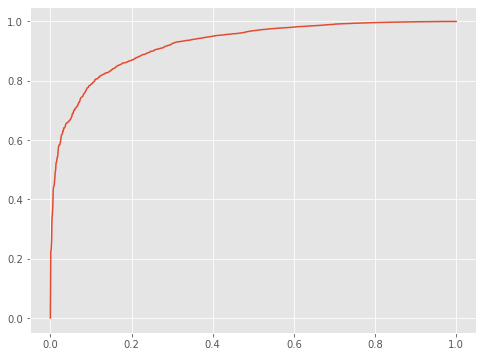

In [16]:
import numpy as np
from kneed import DataGenerator, KneeLocator
np.random.seed(23)

sensitivity = [1, 3, 5, 10, 100, 200, 400]
knees = []
norm_knees = []

n = 1000
x = range(1, n + 1)
y = sorted(np.random.gamma(0.5, 1.0, n), reverse=True)
for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='decreasing', S=s)
    knees.append(kl.knee)
    norm_knees.append(kl.norm_knee)

print(knees)
[43, 137, 178, 258, 305, 482, 482]

print([nk.round(2) for nk in norm_knees])
[0.04, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]

import matplotlib.pyplot as plt
plt.style.use('ggplot');
plt.figure(figsize=(8, 6));
plt.plot(kl.x_normalized, kl.y_normalized);
plt.plot(kl.x_distance, kl.y_distance);
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
for k, c, s in zip(norm_knees, colors, sensitivity):
    plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
plt.legend();

In [17]:
x, y = DataGenerator.figure2()

print([round(i, 3) for i in x])
print([round(i, 3) for i in y])

[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]
[-5.0, 0.263, 1.897, 2.692, 3.163, 3.475, 3.696, 3.861, 3.989, 4.091]

[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]
[-5.0, 0.263, 1.897, 2.692, 3.163, 3.475, 3.696, 3.861, 3.989, 4.091]


[-5.0, 0.263, 1.897, 2.692, 3.163, 3.475, 3.696, 3.861, 3.989, 4.091]

In [18]:
kneedle = KneeLocator(x, y, S=1.0, curve='concave', direction='increasing')

print(round(kneedle.knee, 3))
0.222

print(round(kneedle.elbow, 3))
0.222

0.222
0.222


0.222

In [19]:
print(round(kneedle.knee_y, 3))

1.897


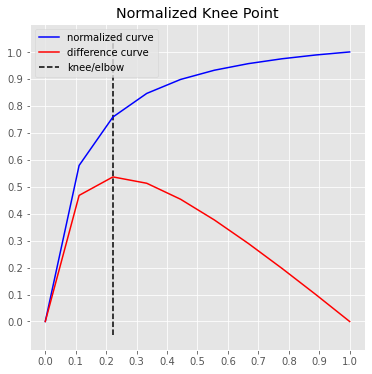

In [20]:
kneedle.plot_knee_normalized()

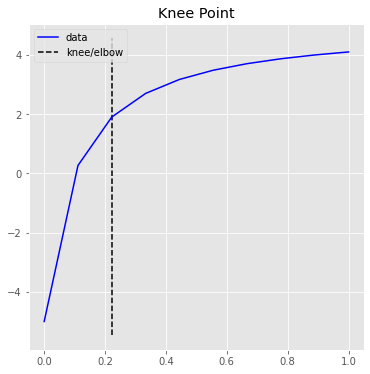

In [21]:
# Raw data and knee.
kneedle.plot_knee()

Help on KneeLocator in module kneed.knee_locator object:

class KneeLocator(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, x:Iterable[float], y:Iterable[float], S:float=1.0, curve:str='concave', direction:str='increasing', interp_method:str='interp1d', online:bool=False)
 |      Once instantiated, this class attempts to find the point of maximum
 |      curvature on a line. The knee is accessible via the `.knee` attribute.
 |      :param x: x values.
 |      :param y: y values.
 |      :param S: Sensitivity, original paper suggests default of 1.0
 |      :param curve: If 'concave', algorithm will detect knees. If 'convex', it
 |          will detect elbows.
 |      :param direction: one of {"increasing", "decreasing"}
 |      :param interp_method: one of {"interp1d", "polynomial"}
 |      :param online: Will correct old knee points if True, will return first knee if False
 |  
 |  find_knee(self)
 |      This function finds and sets the knee value and the normalized

AttributeError: 'KneeLocator' object has no attribute 'x_distance'

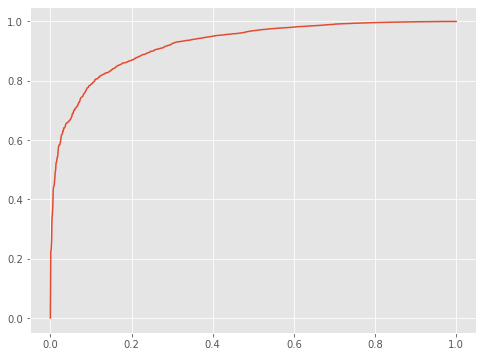

In [25]:
import numpy as np
np.random.seed(23)

sensitivity = [1, 3, 5, 10, 100, 200, 400]
knees = []
norm_knees = []

n = 1000
x = range(1, n + 1)
y = sorted(np.random.gamma(0.5, 1.0, n), reverse=True)
for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='decreasing', S=s)
    knees.append(kl.knee)
    norm_knees.append(kl.norm_knee)
print(kl)
help(kl)
print(knees)
[43, 137, 178, 258, 305, 482, 482]

print([nk.round(2) for nk in norm_knees])
[0.04, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]

import matplotlib.pyplot as plt
plt.style.use('ggplot');
plt.figure(figsize=(8, 6));
plt.plot(kl.x_normalized, kl.y_normalized);
plt.plot(kl.x_distance, kl.y_distance);
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
for k, c, s in zip(norm_knees, colors, sensitivity):
    plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
plt.legend();